# Домашнее задание 3 - PANDAS

Банникова Екатерина НПМбд-01-19

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [94]:
%pylab inline  
# import almost all we need
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Данные можно скачать [отсюда](https://www.dropbox.com/s/5qq94wzmbw4e54r/data.csv?dl=0).

#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [95]:
pass_data = pd.read_csv('data.csv')
pass_data.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [96]:
print('Количество строк =', len(pass_data))
print('Количество столбцов=', len(pass_data.columns))

Количество строк = 4622
Количество столбцов= 5


#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [97]:
# your code
print("1.", pass_data['order_id'].nunique())
print("2.", pass_data['item_name'].nunique())

1. 1834
2. 50


#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

In [98]:
pass_data.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

Пропуски в колонке choice_description

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [99]:
# your code
for i in pass_data.columns:
    if pass_data[i].dtype == 'int64':
        pass_data[i].fillna(0, inplace=True)
    if pass_data[i].dtype == object:
        pass_data[i].fillna('', inplace=True)
pass_data.isnull().sum()

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64

#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [100]:
# your code
print('Тип колонки:', pass_data['item_price'].dtype)

Тип колонки: object


In [101]:
def change(item):
    new_item = item.replace('$', '')
    return float(new_item)

pass_data['new_price'] = pass_data['item_price'].apply(change)
pass_data

,order_id,quantity,item_name,choice_description,item_price,new_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


Какая средняя/минимальная/максимальная цена у товара? 

In [116]:
pass_data['price_for_one'] = pass_data['new_price'] / pass_data['quantity']
pass_data

,order_id,quantity,item_name,choice_description,item_price,new_price,price_for_one
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,8.49
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75,8.75


In [117]:
# по всем товарам
print('Средняя цена=', pass_data['price_for_one'].mean())
print('Минимальная цена=', pass_data['price_for_one'].min())
print('Максимальная цена=', pass_data['price_for_one'].max())


Средняя цена= 7.084424491562234
Минимальная цена= 1.09
Максимальная цена= 11.89


In [118]:
# средняя цена по каждому товару
pass_data.groupby('item_name')['price_for_one'].mean()

item_name
6 Pack Soft Drink                         6.490000
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.087273
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.431667
Bowl                                      7.400000
Burrito                                   7.400000
Canned Soda                               1.090000
Canned Soft Drink                         1.250000
Carnitas Bowl                            10.315588
Carnitas Burrito                          9.975932
Carnitas Crispy Tacos                     9.852857
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                              9.657727
Chicken Burrito                           9.475949
Chicken Crispy Tacos 

In [120]:
# минимальная цена по каждому товару
pass_data.groupby('item_name')['price_for_one'].min()

item_name
6 Pack Soft Drink                        6.49
Barbacoa Bowl                            8.69
Barbacoa Burrito                         8.69
Barbacoa Crispy Tacos                    8.99
Barbacoa Salad Bowl                      9.39
Barbacoa Soft Tacos                      8.99
Bottled Water                            1.09
Bowl                                     7.40
Burrito                                  7.40
Canned Soda                              1.09
Canned Soft Drink                        1.25
Carnitas Bowl                            8.99
Carnitas Burrito                         8.69
Carnitas Crispy Tacos                    8.99
Carnitas Salad                           8.99
Carnitas Salad Bowl                      9.39
Carnitas Soft Tacos                      8.99
Chicken Bowl                             8.19
Chicken Burrito                          8.19
Chicken Crispy Tacos                     8.49
Chicken Salad                            8.19
Chicken Salad Bowl      

In [119]:
# максимальная цена по каждому товару
pass_data.groupby('item_name')['price_for_one'].max()

item_name
6 Pack Soft Drink                         6.49
Barbacoa Bowl                            11.75
Barbacoa Burrito                         11.75
Barbacoa Crispy Tacos                    11.75
Barbacoa Salad Bowl                      11.89
Barbacoa Soft Tacos                      11.75
Bottled Water                             1.50
Bowl                                      7.40
Burrito                                   7.40
Canned Soda                               1.09
Canned Soft Drink                         1.25
Carnitas Bowl                            11.75
Carnitas Burrito                         11.75
Carnitas Crispy Tacos                    11.75
Carnitas Salad                            8.99
Carnitas Salad Bowl                      11.89
Carnitas Soft Tacos                      11.75
Chicken Bowl                             11.25
Chicken Burrito                          11.25
Chicken Crispy Tacos                     11.25
Chicken Salad                            10.98
Chi

Удалите старую колонку с ценой.

In [122]:
# your code
pass_data1 = pass_data.drop(columns = "item_price")
pass_data1

,order_id,quantity,item_name,choice_description,new_price,price_for_one
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [123]:
# your code
sort = pass_data1.sort_values('price_for_one')
sort

,order_id,quantity,item_name,choice_description,new_price,price_for_one
3364,1349,2,Canned Soda,[Coca Cola],2.18,1.09
818,338,3,Bottled Water,,3.27,1.09
1182,485,2,Bottled Water,,2.18,1.09
162,73,2,Canned Soda,[Diet Coke],2.18,1.09
821,338,1,Canned Soda,[Coca Cola],1.09,1.09
...,...,...,...,...,...,...
4239,1692,1,Carnitas Salad Bowl,"[Tomatillo Green Chili Salsa, [Black Beans, Ch...",11.89,11.89
1229,501,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89,11.89
2439,969,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.89,11.89
2442,970,1,Barbacoa Salad Bowl,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.89,11.89


In [124]:
cheap = sort.drop_duplicates(subset=['item_name']).head(5)
cheap

,order_id,quantity,item_name,choice_description,new_price,price_for_one
3364,1349,2,Canned Soda,[Coca Cola],2.18,1.09
818,338,3,Bottled Water,,3.27,1.09
4200,1676,1,Canned Soft Drink,[Coke],1.25,1.25
4057,1624,1,Side of Chips,,1.69,1.69
4509,1793,1,Chips,,1.99,1.99


Самые дешевые 5 товаров: Canned Soda, Bottled Water, Canned Soft Drink, Side of Chips, Chips

In [127]:
expensive = sort[::-1].drop_duplicates(subset=['item_name']).head(5)
expensive

,order_id,quantity,item_name,choice_description,new_price,price_for_one
2401,953,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Guaca...",11.89,11.89
2442,970,1,Barbacoa Salad Bowl,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.89,11.89
4239,1692,1,Carnitas Salad Bowl,"[Tomatillo Green Chili Salsa, [Black Beans, Ch...",11.89,11.89
462,198,1,Carnitas Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.75,11.75
4262,1700,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.75,11.75


Самые дорогие 5 товаров: Steak Burrito, Carnitas Burrito, Carnitas Salad Bowl, Barbacoa Salad Bowl, Steak Salad Bowl

#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [130]:
# your code
len(pass_data1[(pass_data1['item_name'] == 'Chicken Bowl') & (pass_data1['quantity'] > 1)])

33

#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [131]:
# your code
print('Средний чек заказа: ', pass_data1.groupby('order_id')['new_price'].sum().mean())

Средний чек заказа:  18.81142857142869


In [132]:
print('В среднем покупают товаров: ', pass_data1.groupby('order_id')['quantity'].sum().mean())

В среднем покупают товаров:  2.711014176663032


#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [133]:
# your code
(pass_data1.groupby('order_id')['quantity'].sum() == 1).sum()

56

#### 9. [0.25 баллов] Какая самая популярная категория товара? 

In [134]:
# your code
print(*pass_data['item_name'].mode())

Chicken Bowl


#### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [135]:
# your code
Burrito = pass_data1[pass_data1['item_name'].str.contains('Burrito')]
Burrito

,order_id,quantity,item_name,choice_description,new_price,price_for_one
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",8.49,8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.49,8.49
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",8.99,8.99
...,...,...,...,...,...,...
4608,1829,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25,11.25
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25,11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75


In [137]:
print('Виды:', ', '.join(list(Burrito.item_name.unique())))

Виды: Steak Burrito, Chicken Burrito, Barbacoa Burrito, Carnitas Burrito, Veggie Burrito, Burrito


In [140]:
popular = Burrito.groupby(['item_name'])['quantity'].sum().sort_values()
print('Чаще всего покупают:', *popular.tail(1).keys())

Чаще всего покупают: Chicken Burrito


In [142]:
expensive = Burrito.sort_values('price_for_one')['item_name']
print('Самый дорогой:', *expensive.tail(1))

Самый дорогой: Steak Burrito


#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [152]:
a = (pass_data1.groupby('order_id')['new_price'].max() / pass_data1.groupby('order_id')['new_price'].sum() > 0.4).sum()
print(' Количество заказов, в которых есть товар, который стоит более 40% от суммы всего чека:', a)

 Количество заказов, в которых есть товар, который стоит более 40% от суммы всего чека: 1624


#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [156]:
# your code
diet_coke= pass_data1[(pass_data1["choice_description"].str.contains("Diet Coke")) & (pass_data1["item_name"] == "Canned Soft Drink")]
print(((diet_coke["quantity"] * 1.35).T.sum() / diet_coke["new_price"].sum() - 1) * 100, "%")

7.999999999999985 %


#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [160]:
# your code
import numpy as np
matrix = np.random.randn(10, 3)
matrix

array([[ 0.11943198,  0.39285246, -1.62831513],
       [-1.50216727,  1.2369262 , -2.07396018],
       [-0.27398608,  0.14267381, -0.49613874],
       [-0.43148782,  0.35818149, -1.54716461],
       [-1.09636922,  0.86936782,  0.33271398],
       [-2.32225755,  0.00781503, -0.37259799],
       [ 0.79034711,  0.9208307 , -1.16431912],
       [ 0.45213988,  2.01222045,  1.24959242],
       [-0.53243927, -0.6475199 , -0.31964349],
       [ 0.95878507, -1.09092621, -0.57142463]])

In [162]:
DateFrame = pd.DataFrame(matrix).rename({0: "index", 1: "column1", 2: "column2"}, axis = 'columns')
DateFrame

,index,column1,column2
0,0.119432,0.392852,-1.628315
1,-1.502167,1.236926,-2.073960
2,-0.273986,0.142674,-0.496139
3,-0.431488,0.358181,-1.547165
4,-1.096369,0.869368,0.332714
5,-2.322258,0.007815,-0.372598
6,0.790347,0.920831,-1.164319
7,0.452140,2.012220,1.249592
8,-0.532439,-0.647520,-0.319643
9,0.958785,-1.090926,-0.571425


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [163]:
# your code
DateFrame.to_csv('DateFrame.csv', index=False, header=False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

In [164]:
%matplotlib inline  
# нужно для отображения графиков внутри ноутбука
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [179]:
df = pass_data1

In [180]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
df['date'] = df.order_id.map(dates['date'])
df

,order_id,quantity,item_name,choice_description,new_price,price_for_one,date
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2.39,2018-01-04
1,1,1,Izze,[Clementine],3.39,3.39,2018-01-04
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,2018-01-04
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2.39,2018-01-04
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49,2018-01-19
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75,2018-01-04
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75,2018-01-04
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25,2018-01-08
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75,2018-01-08


#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

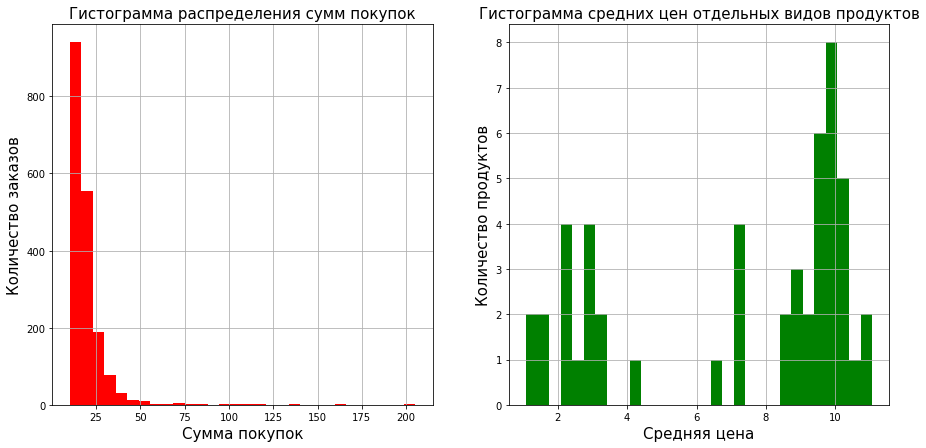

In [191]:
# your code
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].hist(df.groupby(['order_id'])['new_price'].sum(), bins = 30,  color = 'red')
ax[0].set_xlabel('Сумма покупок', fontsize = 15)
ax[0].set_ylabel('Количество заказов', fontsize = 15)
ax[0].set_title('Гистограмма распределения сумм покупок', fontsize = 15)
ax[0].grid()

ax[1].hist(df.groupby(['item_name'])['price_for_one'].mean(), bins = 30, color = 'green')
ax[1].set_xlabel('Средняя цена', fontsize = 15)
ax[1].set_ylabel('Количество продуктов', fontsize = 15)
ax[1].set_title('Гистограмма средних цен отдельных видов продуктов', fontsize = 15)
ax[1].grid()

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

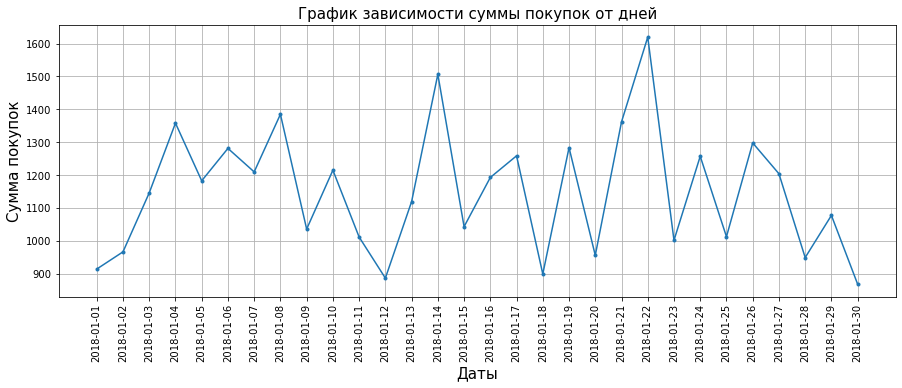

In [197]:
# your code
fig, ax = plt.subplots(figsize = (15, 5))

ax.plot(df.groupby(['date'])['new_price'].sum(), marker = '.')
ax.set_xticks(np.arange(len(df.groupby('date'))))
ax.set_xticklabels(np.array(df.groupby('date').size().keys()), rotation = "vertical")
ax.set_xlabel('Даты', fontsize = 15)
ax.set_ylabel('Сумма покупок', fontsize = 15)
ax.set_title('График зависимости суммы покупок от дней', fontsize = 15)
ax.grid()

#### 3. [1 балл] Постройте средних сумм покупок по дням недели (bar plot).

Text(0.5, 1.0, 'График средних сумм покупок по дням недели')

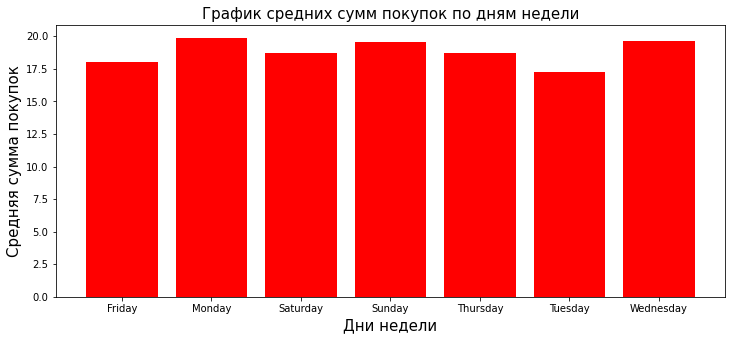

In [212]:
# your code
from datetime import datetime
new_df = df.copy(deep=True)
new_df['date'] = new_df['date'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d"))
new_df['day'] = new_df['date'].dt.day_name()
fig, ax = plt.subplots(figsize = (12, 5))

ax.bar(dict(new_df.groupby(['day', 'order_id'])['new_price'].sum().groupby('day').mean()).keys(), 
       dict(new_df.groupby(['day', 'order_id'])['new_price'].sum().groupby('day').mean()).values(), color='red')
ax.set_xlabel('Дни недели', fontsize = 15)
ax.set_ylabel('Средняя сумма покупок', fontsize = 15)
ax.set_title('График средних сумм покупок по дням недели', fontsize = 15)

#### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

Text(0.5, 1.0, 'Зависимость денег за товар от купленного количества')

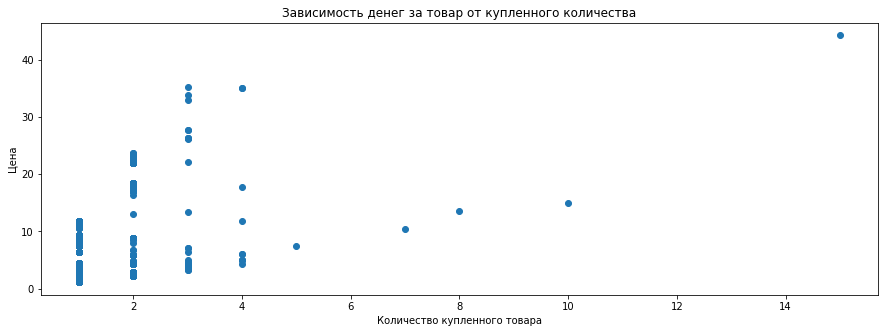

In [210]:
# your code
x = np.array(df['quantity'])
y = np.array(df['new_price'])
label = np.array(df['item_name'])
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x, y)

ax.set_xlabel('Количество купленного товара')
ax.set_ylabel('Цена')
ax.set_title('Зависимость денег за товар от купленного количества')

Сохраните график в формате pdf (так он останется векторизованным).

In [211]:
# your code
fig.savefig("graph.pdf", dpi=200)

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 